# Importing necessary libraries and dataset

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.metrics as metrics
from sklearn.metrics import r2_score
import sklearn.linear_model as linear_model
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

# personal drive
#i_a = pd.read_csv('/content/drive/MyDrive/data_mining/final_2020_2021_2022.csv')

# local copy
i_a = pd.read_csv('dataset/liquor_sales_2020_2021_2022Mar.csv')

random_state=42
i_a.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Unnamed: 0,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,...,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,0,INV-24292600043,2020-01-02,4404,KUM & GO #292 / Ankeny,1825 N Ankeny Blvd,Ankeny,50021.0,POINT (-93.619787 41.60566),77.0,...,10805,Crown Royal Regal Apple,24,375,8.00,12.00,2,24.00,0.75,0.19
1,1,INV-24306300051,2020-01-02,5257,MAD Ave Quik Shop,"405, Madison Ave",Ottumwa,52501.0,POINT (-93.619787 41.60566),90.0,...,36307,Hawkeye Vodka,12,1000,4.05,6.08,12,72.96,12.00,3.17
2,2,INV-24290400075,2020-01-02,2502,Hy-Vee Wine and Spirits / Ankeny,410 North Ankeny Blvd,Ankeny,50021.0,POINT (-93.619787 41.60566),77.0,...,5326,Johnnie Walker Black,12,750,21.49,32.24,4,128.96,3.00,0.79
3,3,INV-24312800016,2020-01-02,5709,JW Liquor,4518 Mortonsen Street Suite #109,Ames,50014.0,POINT (-93.619787 41.60566),85.0,...,68036,Baileys Original Irish Cream,12,750,16.49,24.74,6,121.50,4.50,1.18
4,4,INV-24294900180,2020-01-02,2647,Hy-Vee #7 / Cedar Rapids,5050 Edgewood Rd,Cedar Rapids,52411.0,POINT (-91.701581 42.030129),57.0,...,74086,Godiva Dark Chocolate Liqueur,12,750,17.00,25.50,3,76.50,2.25,0.59


# Data understanding function

In [3]:
# Fucntion on analysis of dataset - metrics included (count of NaN variables, data types of features, size of features, and common stats like mean, medin, mode of all features)
def exp_data_analysis(df):
    print("missing values \n", df.isnull().sum())
    print("dataframe index \n", df.index)
    print("dataframe types \n", df.dtypes)
    print("dataframe shape \n", df.shape)
    print("dataframe describe \n", df.describe())
    for feature in df:
        print(feature, df[feature].nunique())

In [4]:
exp_data_analysis(i_a)

missing values 
 Unnamed: 0                   0
Invoice/Item Number          0
Date                         0
Store Number                 0
Store Name                   0
Address                    142
City                       142
Zip Code                   142
Store Location           61740
County Number              142
County                     142
Category                     0
Category Name                0
Vendor Number                0
Vendor Name                  0
Item Number                  0
Item Description             0
Pack                         0
Bottle Volume (ml)           0
State Bottle Cost            0
State Bottle Retail          0
Bottles Sold                 0
Sale (Dollars)               0
Volume Sold (Liters)         0
Volume Sold (Gallons)        0
dtype: int64
dataframe index 
 RangeIndex(start=0, stop=5828687, step=1)
dataframe types 
 Unnamed: 0                 int64
Invoice/Item Number       object
Date                      object
Store Number      

# Common Data preparation

### Found that date is formatted in string, hence converting to 'date' object

In [5]:
i_a["Date"] = pd.to_datetime(i_a["Date"])

### Assigning each record its relevant quarter it falls into based on 'date' feature

In [6]:
i_a["Quarter_Year"] = "-"

i_a['Quarter_Year'] = i_a['Date'].dt.to_period('Q')
i_a['Quarter_Year'] = i_a['Quarter_Year'].astype(str)

i_a.loc[i_a["Quarter_Year"] == "2020Q1" , "Quarter_Year"] = "Q1_2020"
i_a.loc[i_a["Quarter_Year"] == "2020Q2" , "Quarter_Year"] = "Q2_2020"
i_a.loc[i_a["Quarter_Year"] == "2020Q3" , "Quarter_Year"] = "Q3_2020"
i_a.loc[i_a["Quarter_Year"] == "2020Q4" , "Quarter_Year"] = "Q4_2020"

i_a.loc[i_a["Quarter_Year"] == "2021Q1" , "Quarter_Year"] = "Q1_2021"
i_a.loc[i_a["Quarter_Year"] == "2021Q2" , "Quarter_Year"] = "Q2_2021"
i_a.loc[i_a["Quarter_Year"] == "2021Q3" , "Quarter_Year"] = "Q3_2021"
i_a.loc[i_a["Quarter_Year"] == "2021Q4" , "Quarter_Year"] = "Q4_2021"

i_a.loc[i_a["Quarter_Year"] == "2022Q1" , "Quarter_Year"] = "Q1_2022"
i_a.head()

,Unnamed: 0,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,...,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Quarter_Year
0,0,INV-24292600043,2020-01-02,4404,KUM & GO #292 / Ankeny,1825 N Ankeny Blvd,Ankeny,50021.0,POINT (-93.619787 41.60566),77.0,...,Crown Royal Regal Apple,24,375,8.00,12.00,2,24.00,0.75,0.19,Q1_2020
1,1,INV-24306300051,2020-01-02,5257,MAD Ave Quik Shop,"405, Madison Ave",Ottumwa,52501.0,POINT (-93.619787 41.60566),90.0,...,Hawkeye Vodka,12,1000,4.05,6.08,12,72.96,12.00,3.17,Q1_2020
2,2,INV-24290400075,2020-01-02,2502,Hy-Vee Wine and Spirits / Ankeny,410 North Ankeny Blvd,Ankeny,50021.0,POINT (-93.619787 41.60566),77.0,...,Johnnie Walker Black,12,750,21.49,32.24,4,128.96,3.00,0.79,Q1_2020
3,3,INV-24312800016,2020-01-02,5709,JW Liquor,4518 Mortonsen Street Suite #109,Ames,50014.0,POINT (-93.619787 41.60566),85.0,...,Baileys Original Irish Cream,12,750,16.49,24.74,6,121.50,4.50,1.18,Q1_2020
4,4,INV-24294900180,2020-01-02,2647,Hy-Vee #7 / Cedar Rapids,5050 Edgewood Rd,Cedar Rapids,52411.0,POINT (-91.701581 42.030129),57.0,...,Godiva Dark Chocolate Liqueur,12,750,17.00,25.50,3,76.50,2.25,0.59,Q1_2020


### Assigning each record its relevant size of bottle sold. 

In [7]:
i_a = i_a.rename(columns={"Bottle Volume (ml)": "Bottle_Volume_ml"})

i_a["Consolidated_Bottle_ml"] = "-"

i_a.loc[(i_a["Consolidated_Bottle_ml"] != 750) | (i_a["Consolidated_Bottle_ml"] != 1000) | (i_a["Consolidated_Bottle_ml"] != 1750) , "Consolidated_Bottle_ml"] = "Other_ml"
i_a.loc[i_a["Bottle_Volume_ml"] == 750, "Consolidated_Bottle_ml"] = "750ml"
i_a.loc[i_a["Bottle_Volume_ml"] == 1000, "Consolidated_Bottle_ml"] = "1000ml"
i_a.loc[i_a["Bottle_Volume_ml"] == 1750, "Consolidated_Bottle_ml"] = "1750ml"
i_a.head()

,Unnamed: 0,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,...,Pack,Bottle_Volume_ml,State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Quarter_Year,Consolidated_Bottle_ml
0,0,INV-24292600043,2020-01-02,4404,KUM & GO #292 / Ankeny,1825 N Ankeny Blvd,Ankeny,50021.0,POINT (-93.619787 41.60566),77.0,...,24,375,8.00,12.00,2,24.00,0.75,0.19,Q1_2020,Other_ml
1,1,INV-24306300051,2020-01-02,5257,MAD Ave Quik Shop,"405, Madison Ave",Ottumwa,52501.0,POINT (-93.619787 41.60566),90.0,...,12,1000,4.05,6.08,12,72.96,12.00,3.17,Q1_2020,1000ml
2,2,INV-24290400075,2020-01-02,2502,Hy-Vee Wine and Spirits / Ankeny,410 North Ankeny Blvd,Ankeny,50021.0,POINT (-93.619787 41.60566),77.0,...,12,750,21.49,32.24,4,128.96,3.00,0.79,Q1_2020,750ml
3,3,INV-24312800016,2020-01-02,5709,JW Liquor,4518 Mortonsen Street Suite #109,Ames,50014.0,POINT (-93.619787 41.60566),85.0,...,12,750,16.49,24.74,6,121.50,4.50,1.18,Q1_2020,750ml
4,4,INV-24294900180,2020-01-02,2647,Hy-Vee #7 / Cedar Rapids,5050 Edgewood Rd,Cedar Rapids,52411.0,POINT (-91.701581 42.030129),57.0,...,12,750,17.00,25.50,3,76.50,2.25,0.59,Q1_2020,750ml


### Assigning each record its category of Liquor sold

In [8]:
i_a = i_a.rename(columns={"Category Name": "Alcohol_Category_Name"})
i_a['Alcohol_Category_Name'].str.lower()

Alcohol_Category_Name_list = list(i_a['Alcohol_Category_Name'])
Consolidated_Category_list = []
for x in Alcohol_Category_Name_list:
  if "whisk" in x.lower():
    Consolidated_Category_list.append("WHISKEY")
  elif "vodka" in x.lower():
    Consolidated_Category_list.append("VODKA")
  else:
    Consolidated_Category_list.append("NON-WHISKEY-VODKA")

i_a["Consolidated_Category"] = Consolidated_Category_list
i_a = i_a.rename(columns={"Sale (Dollars)": "Sale_Dollars", "Store Number" : "Store_Number","Bottles Sold":"Bottles_Sold"})
i_a.tail()

,Unnamed: 0,Invoice/Item Number,Date,Store_Number,Store Name,Address,City,Zip Code,Store Location,County Number,...,Bottle_Volume_ml,State Bottle Cost,State Bottle Retail,Bottles_Sold,Sale_Dollars,Volume Sold (Liters),Volume Sold (Gallons),Quarter_Year,Consolidated_Bottle_ml,Consolidated_Category
5828682,3214317,INV-46062600017,2022-03-31,2663,Hy-Vee Food Store / Urbandale,8701 Douglas,Urbandale,50322.0,"{'type': 'Point', 'coordinates': [-93.739105, ...",77.0,...,750,11.50,17.25,6,90.00,4.5,1.18,Q1_2022,750ml,WHISKEY
5828683,3214318,INV-46077600002,2022-03-31,5995,Super Stop Liquor and Wine / Altoona,2635 Adventureland Dr,Altoona,50009.0,"{'type': 'Point', 'coordinates': [-93.494757, ...",77.0,...,750,22.48,33.72,2,67.44,1.5,0.39,Q1_2022,750ml,NON-WHISKEY-VODKA
5828684,3214319,INV-46073900016,2022-03-31,3722,Wal-Mart 1361 / Sioux City,3400 Singing Hills Blvd,Sioux City,51106.0,"{'type': 'Point', 'coordinates': [-96.364164, ...",97.0,...,1750,7.99,11.99,6,71.94,10.5,2.77,Q1_2022,1750ml,NON-WHISKEY-VODKA
5828685,3214320,INV-46073600008,2022-03-31,4197,Fareway Stores #014 / Sergeant Bluff,700 1st St,Sergeant Bluff,51054.0,"{'type': 'Point', 'coordinates': [-96.353077, ...",97.0,...,750,15.91,23.87,12,280.32,9.0,2.37,Q1_2022,750ml,WHISKEY
5828686,3214321,INV-46068100004,2022-03-31,4428,Kum & Go #200 / Ames,4510 Mortensen Rd,Ames,50014.0,"{'type': 'Point', 'coordinates': [-93.679384, ...",85.0,...,750,3.41,5.12,4,20.48,3.0,0.79,Q1_2022,750ml,VODKA


# Data preparation - 2020

## Pulling out dataframe only containing only 2020 sales data

In [9]:
quarter_years_2020 = ['Q1_2020','Q2_2020','Q3_2020','Q4_2020']
i_a_2020 = i_a.loc[i_a["Quarter_Year"].isin(quarter_years_2020)]
i_a_2020.head()

,Unnamed: 0,Invoice/Item Number,Date,Store_Number,Store Name,Address,City,Zip Code,Store Location,County Number,...,Bottle_Volume_ml,State Bottle Cost,State Bottle Retail,Bottles_Sold,Sale_Dollars,Volume Sold (Liters),Volume Sold (Gallons),Quarter_Year,Consolidated_Bottle_ml,Consolidated_Category
0,0,INV-24292600043,2020-01-02,4404,KUM & GO #292 / Ankeny,1825 N Ankeny Blvd,Ankeny,50021.0,POINT (-93.619787 41.60566),77.0,...,375,8.00,12.00,2,24.00,0.75,0.19,Q1_2020,Other_ml,WHISKEY
1,1,INV-24306300051,2020-01-02,5257,MAD Ave Quik Shop,"405, Madison Ave",Ottumwa,52501.0,POINT (-93.619787 41.60566),90.0,...,1000,4.05,6.08,12,72.96,12.00,3.17,Q1_2020,1000ml,VODKA
2,2,INV-24290400075,2020-01-02,2502,Hy-Vee Wine and Spirits / Ankeny,410 North Ankeny Blvd,Ankeny,50021.0,POINT (-93.619787 41.60566),77.0,...,750,21.49,32.24,4,128.96,3.00,0.79,Q1_2020,750ml,WHISKEY
3,3,INV-24312800016,2020-01-02,5709,JW Liquor,4518 Mortonsen Street Suite #109,Ames,50014.0,POINT (-93.619787 41.60566),85.0,...,750,16.49,24.74,6,121.50,4.50,1.18,Q1_2020,750ml,NON-WHISKEY-VODKA
4,4,INV-24294900180,2020-01-02,2647,Hy-Vee #7 / Cedar Rapids,5050 Edgewood Rd,Cedar Rapids,52411.0,POINT (-91.701581 42.030129),57.0,...,750,17.00,25.50,3,76.50,2.25,0.59,Q1_2020,750ml,NON-WHISKEY-VODKA


## Creating dataframe which is grouped by store number and its total sales in 2020

In [10]:
store_sales_2020 = pd.DataFrame(i_a_2020.groupby('Store_Number').Sale_Dollars.sum())
store_sales_2020.rename(columns={'Sale_Dollars':'Sale_Dollars_Total_2020'}, inplace=True)
store_sales_2020

,Sale_Dollars_Total_2020
Store_Number,
2106,786504.43
2113,7437.09
2130,951198.97
2178,362299.62
2190,2683364.90
...,...
9041,61814.40
9042,32214.00
9046,22878.00


## Creating dataframe which is grouped by store number and quarter year which contains store wise bottles sold in each quarter year

In [11]:
add_Q1_bottle_sold_2020 = pd.DataFrame(i_a_2020.groupby(['Store_Number', 'Quarter_Year']).Bottles_Sold.sum().unstack())
add_Q1_bottle_sold_2020.rename(columns={'Q1_2020':'Bottles_Sold_Q1_2020'}, inplace=True)

# Dropping Q2, Q3 and Q4 data as we need only Q1 data for modelling
add_Q1_bottle_sold_2020.drop(['Q2_2020', 'Q3_2020', 'Q4_2020'], axis=1, inplace=True)
add_Q1_bottle_sold_2020.head()

Quarter_Year,Bottles_Sold_Q1_2020
Store_Number,
2106,17625.0
2113,586.0
2130,17744.0
2178,5182.0
2190,31755.0


## Creating a dataframe which shows the county the store belongs to

In [12]:
add_store_county_2020 = pd.DataFrame(i_a_2020.groupby('Store_Number').County.agg(lambda x:x.value_counts().index[0]))
add_store_county_2020

,County
Store_Number,
2106,BLACK HAWK
2113,WEBSTER
2130,BLACK HAWK
2178,ALLAMAKEE
2190,POLK
...,...
9041,KOSSUTH
9042,CLAY
9046,LYON


## Creating a dataframe which shows store sales for each bottle size

In [13]:
i_a_Q1_2020 = i_a[i_a['Quarter_Year'] == 'Q1_2020']
add_Q1_bottle_sizes_2020 = pd.DataFrame(i_a_Q1_2020.groupby(['Store_Number', 'Consolidated_Bottle_ml']).Sale_Dollars.sum().unstack())
add_Q1_bottle_sizes_2020.rename(columns={'1000ml':'1000ml_Sales_Q1_2020', '1750ml':'1750ml_Sales_Q1_2020','750ml':'750ml_Sales_Q1_2020','Other_ml':'Other_ml_Sales_Q1_2020'}, inplace=True)
add_Q1_bottle_sizes_2020.head()

Consolidated_Bottle_ml,1000ml_Sales_Q1_2020,1750ml_Sales_Q1_2020,750ml_Sales_Q1_2020,Other_ml_Sales_Q1_2020
Store_Number,,,,
2106,166820.13,2151.00,70771.67,5872.63
2113,4277.65,916.27,1757.00,486.17
2130,188832.06,15615.06,51715.47,8418.79
2178,20434.66,28230.98,18277.92,5626.80
2190,30671.79,74835.34,352384.33,85722.76


## Creating a dataframe which shows store sales for each type of liquor

In [14]:
add_Q1_consolidated_category_2020 = pd.DataFrame(i_a_Q1_2020.groupby(['Store_Number', 'Consolidated_Category']).Sale_Dollars.sum().unstack())
add_Q1_consolidated_category_2020.rename(columns={'NON-WHISKEY-VODKA':'NON-WHISKEY-VODKA_Sales_Q1_2020', 'VODKA':'VODKA_Sales_Q1_2020','WHISKEY':'WHISKEY_Sales_Q1_2020'}, inplace=True)
add_Q1_consolidated_category_2020.head()

Consolidated_Category,NON-WHISKEY-VODKA_Sales_Q1_2020,VODKA_Sales_Q1_2020,WHISKEY_Sales_Q1_2020
Store_Number,,,
2106,123488.17,50255.73,71871.53
2113,2845.50,1650.52,2941.07
2130,124907.97,45030.30,94643.11
2178,28427.09,14233.23,29910.04
2190,335827.22,67688.05,140098.95


## Creating a dataframe showing total Q1 sales for the store

In [15]:
add_Q1_total_sales_2020 = pd.DataFrame(i_a_2020.groupby(['Store_Number', 'Quarter_Year']).Sale_Dollars.sum().unstack())
add_Q1_total_sales_2020.rename(columns={'Q1_2020':'Q1_2020_total_sales'}, inplace=True)
add_Q1_total_sales_2020.drop(['Q2_2020', 'Q3_2020', 'Q4_2020'], axis=1, inplace=True)
add_Q1_total_sales_2020.head()

Quarter_Year,Q1_2020_total_sales
Store_Number,
2106,245615.43
2113,7437.09
2130,264581.38
2178,72570.36
2190,543614.22


## Merging all the above created dataframes for modelling

In [16]:
model_df_2020 = pd.concat([add_Q1_bottle_sold_2020, add_Q1_bottle_sizes_2020, add_Q1_consolidated_category_2020, add_Q1_total_sales_2020,store_sales_2020], axis=1)

# filling all NaNs with 0s as there are few combinations of features with the store number where sales did not take place in Q1
model_df_2020.fillna(0,inplace = True)

print("shape of the dataframe:",model_df_2020.shape)
model_df_2020.head()

shape of the dataframe: (1878, 10)


,Bottles_Sold_Q1_2020,1000ml_Sales_Q1_2020,1750ml_Sales_Q1_2020,750ml_Sales_Q1_2020,Other_ml_Sales_Q1_2020,NON-WHISKEY-VODKA_Sales_Q1_2020,VODKA_Sales_Q1_2020,WHISKEY_Sales_Q1_2020,Q1_2020_total_sales,Sale_Dollars_Total_2020
Store_Number,,,,,,,,,,
2106,17625.0,166820.13,2151.00,70771.67,5872.63,123488.17,50255.73,71871.53,245615.43,786504.43
2113,586.0,4277.65,916.27,1757.00,486.17,2845.50,1650.52,2941.07,7437.09,7437.09
2130,17744.0,188832.06,15615.06,51715.47,8418.79,124907.97,45030.30,94643.11,264581.38,951198.97
2178,5182.0,20434.66,28230.98,18277.92,5626.80,28427.09,14233.23,29910.04,72570.36,362299.62
2190,31755.0,30671.79,74835.34,352384.33,85722.76,335827.22,67688.05,140098.95,543614.22,2683364.90


# Data preparation - 2021

## Pulling out dataframe only containing only 2021 sales data

In [17]:
quarter_years_2021 = ['Q1_2021','Q2_2021','Q3_2021','Q4_2021']
i_a_2021 = i_a.loc[i_a["Quarter_Year"].isin(quarter_years_2021)]
i_a_2021.tail()

,Unnamed: 0,Invoice/Item Number,Date,Store_Number,Store Name,Address,City,Zip Code,Store Location,County Number,...,Bottle_Volume_ml,State Bottle Cost,State Bottle Retail,Bottles_Sold,Sale_Dollars,Volume Sold (Liters),Volume Sold (Gallons),Quarter_Year,Consolidated_Bottle_ml,Consolidated_Category
5237072,2622707,INV-43451800004,2021-12-31,2606,Hy-Vee Wine and Spirits / Humboldt,1011 13th St North,Humboldt,50548.0,POINT (-94.227116 42.733221),46.0,...,1000,5.42,8.13,12,97.56,12.00,3.17,Q4_2021,1000ml,NON-WHISKEY-VODKA
5237073,2622708,INV-43449500083,2021-12-31,2602,Hy-Vee Food Store / Webster City,823 2nd St,Webster City,50595.0,POINT (-93.825486 42.469466),40.0,...,750,3.67,5.51,3,16.53,2.25,0.59,Q4_2021,750ml,NON-WHISKEY-VODKA
5237074,2622709,INV-43449500004,2021-12-31,2602,Hy-Vee Food Store / Webster City,823 2nd St,Webster City,50595.0,POINT (-93.825486 42.469466),40.0,...,375,3.50,5.25,3,15.75,1.12,0.29,Q4_2021,Other_ml,WHISKEY
5237075,2622710,INV-43434300002,2021-12-31,6045,Kum & Go #3156 / Clive,15590 Hickman Rd,Clive,50325.0,POINT (-93.833455 41.614719),77.0,...,1750,19.00,28.50,6,171.00,10.50,2.77,Q4_2021,1750ml,VODKA
5237076,2622711,INV-43443800011,2021-12-31,5236,"Giggle Juice Liquor Station, LLC",600 W Main St,Anamosa,52205.0,POINT (-91.290948 42.108201),53.0,...,750,11.00,16.50,12,198.00,9.00,2.37,Q4_2021,750ml,WHISKEY


## Creating dataframe which is grouped by store number and its total sales in 2021

In [18]:
store_sales_2021 = pd.DataFrame(i_a_2021.groupby('Store_Number').Sale_Dollars.sum())
store_sales_2021.rename(columns={'Sale_Dollars':'Sale_Dollars_Total_2021'}, inplace=True)
store_sales_2021.head()

,Sale_Dollars_Total_2021
Store_Number,
2106,1033483.12
2130,1242342.77
2178,2933.14
2190,2629203.54
2191,1346072.45


## Creating dataframe which is grouped by store number and quarter year which contains store wise bottles sold in each quarter year

In [19]:
add_Q1_bottle_sold_2021 = pd.DataFrame(i_a_2021.groupby(['Store_Number', 'Quarter_Year']).Bottles_Sold.sum().unstack())
add_Q1_bottle_sold_2021.rename(columns={'Q1_2021':'Bottles_Sold_Q1_2021'}, inplace=True)

# Dropping Q2, Q3 and Q4 data as we need only Q1 data for modelling
add_Q1_bottle_sold_2021.drop(['Q2_2021', 'Q3_2021', 'Q4_2021'], axis=1, inplace=True)
add_Q1_bottle_sold_2021.head()

Quarter_Year,Bottles_Sold_Q1_2021
Store_Number,
2106,16731.0
2130,17964.0
2178,243.0
2190,33797.0
2191,18738.0


## Creating a dataframe which shows the county a store belongs to

In [20]:
add_store_county_2021 = pd.DataFrame(i_a_2021.groupby('Store_Number').County.agg(lambda x:x.value_counts().index[0]))
add_store_county_2021

,County
Store_Number,
2106,BLACK HAWK
2130,BLACK HAWK
2178,ALLAMAKEE
2190,POLK
2191,LEE
...,...
9042,CLAY
9046,LYON
9047,CLARKE


## Creating a dataframe which shows store sales for each bottle size

In [21]:
i_a_Q1_2021 = i_a[i_a['Quarter_Year'] == 'Q1_2021']
add_Q1_bottle_sizes_2021 = pd.DataFrame(i_a_Q1_2021.groupby(['Store_Number', 'Consolidated_Bottle_ml']).Sale_Dollars.sum().unstack())
add_Q1_bottle_sizes_2021.rename(columns={'1000ml':'1000ml_Sales_Q1_2021', '1750ml':'1750ml_Sales_Q1_2021','750ml':'750ml_Sales_Q1_2021','Other_ml':'Other_ml_Sales_Q1_2021'}, inplace=True)
add_Q1_bottle_sizes_2021.head()

Consolidated_Bottle_ml,1000ml_Sales_Q1_2021,1750ml_Sales_Q1_2021,750ml_Sales_Q1_2021,Other_ml_Sales_Q1_2021
Store_Number,,,,
2106,166780.96,7236.79,69493.87,1073.55
2130,207009.24,17936.46,65215.95,5919.08
2178,391.80,1349.16,921.87,270.31
2190,34182.75,72700.03,447123.40,81057.05
2191,192278.56,41160.71,77130.27,4298.34


## Creating a dataframe which shows sales of each type of liquor by store

In [22]:
add_Q1_consolidated_category_2021 = pd.DataFrame(i_a_Q1_2021.groupby(['Store_Number', 'Consolidated_Category']).Sale_Dollars.sum().unstack())
add_Q1_consolidated_category_2021.rename(columns={'NON-WHISKEY-VODKA':'NON-WHISKEY-VODKA_Sales_Q1_2021', 'VODKA':'VODKA_Sales_Q1_2021','WHISKEY':'WHISKEY_Sales_Q1_2021'}, inplace=True)
add_Q1_consolidated_category_2021.head()

Consolidated_Category,NON-WHISKEY-VODKA_Sales_Q1_2021,VODKA_Sales_Q1_2021,WHISKEY_Sales_Q1_2021
Store_Number,,,
2106,127343.09,48024.57,69217.51
2130,140035.77,54577.38,101467.58
2178,1428.98,830.35,673.81
2190,361990.67,70009.96,203062.60
2191,149124.50,54489.76,111253.62


## Creating a dataframe containing total sales in Q1 2021 by each store

In [23]:
add_Q1_total_sales_2021 = pd.DataFrame(i_a_2021.groupby(['Store_Number', 'Quarter_Year']).Sale_Dollars.sum().unstack())
add_Q1_total_sales_2021.rename(columns={'Q1_2021':'Q1_2021_total_sales'}, inplace=True)
add_Q1_total_sales_2021.drop(['Q2_2021', 'Q3_2021', 'Q4_2021'], axis=1, inplace=True)
add_Q1_total_sales_2021.head()

Quarter_Year,Q1_2021_total_sales
Store_Number,
2106,244585.17
2130,296080.73
2178,2933.14
2190,635063.23
2191,314867.88


## Merging all the above created dataframes

In [24]:
model_df_2021 = pd.concat([add_Q1_bottle_sold_2021, add_Q1_bottle_sizes_2021, add_Q1_consolidated_category_2021, add_Q1_total_sales_2021, store_sales_2021], axis=1)

# filling all NaNs with 0s as there are few combinations of features with the store number where sales did not take place in Q1
model_df_2021.fillna(0,inplace = True)

print("shape of the dataframe:",model_df_2021.shape)
model_df_2021.head()

shape of the dataframe: (1948, 10)


,Bottles_Sold_Q1_2021,1000ml_Sales_Q1_2021,1750ml_Sales_Q1_2021,750ml_Sales_Q1_2021,Other_ml_Sales_Q1_2021,NON-WHISKEY-VODKA_Sales_Q1_2021,VODKA_Sales_Q1_2021,WHISKEY_Sales_Q1_2021,Q1_2021_total_sales,Sale_Dollars_Total_2021
Store_Number,,,,,,,,,,
2106,16731.0,166780.96,7236.79,69493.87,1073.55,127343.09,48024.57,69217.51,244585.17,1033483.12
2130,17964.0,207009.24,17936.46,65215.95,5919.08,140035.77,54577.38,101467.58,296080.73,1242342.77
2178,243.0,391.80,1349.16,921.87,270.31,1428.98,830.35,673.81,2933.14,2933.14
2190,33797.0,34182.75,72700.03,447123.40,81057.05,361990.67,70009.96,203062.60,635063.23,2629203.54
2191,18738.0,192278.56,41160.71,77130.27,4298.34,149124.50,54489.76,111253.62,314867.88,1346072.45


# Data preparation - 2022

## Pulling out dataframe only containing only 2022 sales data

In [25]:
i_a_2022 = i_a.loc[i_a["Quarter_Year"] == 'Q1_2022']
i_a_2022.head()

,Unnamed: 0,Invoice/Item Number,Date,Store_Number,Store Name,Address,City,Zip Code,Store Location,County Number,...,Bottle_Volume_ml,State Bottle Cost,State Bottle Retail,Bottles_Sold,Sale_Dollars,Volume Sold (Liters),Volume Sold (Gallons),Quarter_Year,Consolidated_Bottle_ml,Consolidated_Category
5237077,2622712,INV-43468500052,2022-01-02,2190,"Central City Liquor, Inc.",1460 2ND AVE,Des Moines,50314.0,"{'type': 'Point', 'coordinates': [-93.619788, ...",77.0,...,750,11.67,17.51,3,52.53,2.25,0.59,Q1_2022,750ml,NON-WHISKEY-VODKA
5237078,2622713,INV-43468400001,2022-01-02,2536,HY-VEE / PLEASANT HILL,4815 Maple Drive,Pleasant Hill,50317.0,"{'type': 'Point', 'coordinates': [-93.519491, ...",77.0,...,50,7.92,11.88,10,118.80,0.50,0.13,Q1_2022,Other_ml,VODKA
5237079,2622714,INV-43468400006,2022-01-02,2536,HY-VEE / PLEASANT HILL,4815 Maple Drive,Pleasant Hill,50317.0,"{'type': 'Point', 'coordinates': [-93.519491, ...",77.0,...,750,9.01,13.52,12,162.24,9.00,2.37,Q1_2022,750ml,VODKA
5237080,2622715,INV-43468400011,2022-01-02,2536,HY-VEE / PLEASANT HILL,4815 Maple Drive,Pleasant Hill,50317.0,"{'type': 'Point', 'coordinates': [-93.519491, ...",77.0,...,750,7.50,11.25,12,135.00,9.00,2.37,Q1_2022,750ml,WHISKEY
5237081,2622716,INV-43468500039,2022-01-02,2190,"Central City Liquor, Inc.",1460 2ND AVE,Des Moines,50314.0,"{'type': 'Point', 'coordinates': [-93.619788, ...",77.0,...,750,12.40,18.60,2,37.20,1.50,0.39,Q1_2022,750ml,NON-WHISKEY-VODKA


## Creating dataframe which is grouped by store number and its total sales in 2021

In [26]:
store_sales_2022 = pd.DataFrame(i_a_2022.groupby('Store_Number').Sale_Dollars.sum())
store_sales_2022.rename(columns={'Sale_Dollars':'Sale_Dollars_Total_2022'}, inplace=True)
store_sales_2022.head()

,Sale_Dollars_Total_2022
Store_Number,
2106,216484.40
2130,361693.59
2190,584212.81
2191,321329.79
2200,69603.23


## Creating dataframe which is grouped by store number and quarter year which shows number of bottles sold in each quarter year by store

In [27]:
add_Q1_bottle_sold_2022 = pd.DataFrame(i_a_2022.groupby(['Store_Number', 'Quarter_Year']).Bottles_Sold.sum().unstack())
add_Q1_bottle_sold_2022.rename(columns={'Q1_2022':'Bottles_Sold_Q1_2022'}, inplace=True)
add_Q1_bottle_sold_2022.head()

Quarter_Year,Bottles_Sold_Q1_2022
Store_Number,
2106,13885
2130,20955
2190,31491
2191,18055
2200,4225


## Creating a dataframe which shows the county a store belongs to

In [28]:
add_store_county_2022 = pd.DataFrame(i_a_2022.groupby('Store_Number').County.agg(lambda x:x.value_counts().index[0]))
add_store_county_2022.head()

,County
Store_Number,
2106,BLACK HAWK
2130,BLACK HAWK
2190,POLK
2191,LEE
2200,SAC


## Creating a dataframe which shows sales relavent to bottle size by each store

In [29]:
i_a_Q1_2022 = i_a[i_a['Quarter_Year'] == 'Q1_2022']
add_Q1_bottle_sizes_2022 = pd.DataFrame(i_a_Q1_2022.groupby(['Store_Number', 'Consolidated_Bottle_ml']).Sale_Dollars.sum().unstack())
add_Q1_bottle_sizes_2022.rename(columns={'1000ml':'1000ml_Sales_Q1_2022', '1750ml':'1750ml_Sales_Q1_2022','750ml':'750ml_Sales_Q1_2022','Other_ml':'Other_ml_Sales_Q1_2022'}, inplace=True)
add_Q1_bottle_sizes_2022.head()

Consolidated_Bottle_ml,1000ml_Sales_Q1_2022,1750ml_Sales_Q1_2022,750ml_Sales_Q1_2022,Other_ml_Sales_Q1_2022
Store_Number,,,,
2106,140752.52,5630.28,69184.72,916.88
2130,251401.89,16354.32,88044.00,5893.38
2190,30095.16,68433.04,423701.19,61983.42
2191,189141.44,49444.38,77379.94,5364.03
2200,22228.86,26986.10,14909.63,5478.64


## Creating a dataframe which shows sales of each type of liquor by store

In [30]:
add_Q1_consolidated_category_2022 = pd.DataFrame(i_a_Q1_2022.groupby(['Store_Number', 'Consolidated_Category']).Sale_Dollars.sum().unstack())
add_Q1_consolidated_category_2022.rename(columns={'NON-WHISKEY-VODKA':'NON-WHISKEY-VODKA_Sales_Q1_2022', 'VODKA':'VODKA_Sales_Q1_2022','WHISKEY':'WHISKEY_Sales_Q1_2022'}, inplace=True)
add_Q1_consolidated_category_2022.head()

Consolidated_Category,NON-WHISKEY-VODKA_Sales_Q1_2022,VODKA_Sales_Q1_2022,WHISKEY_Sales_Q1_2022
Store_Number,,,
2106,118637.43,37291.17,60555.80
2130,174377.61,59224.38,128091.60
2190,327809.17,59374.41,197029.23
2191,137211.90,53369.64,130748.25
2200,29017.75,8083.10,32502.38


## Creating a dataframe containing total sales in Q1 2022 by each store

In [31]:
add_Q1_total_sales_2022 = pd.DataFrame(i_a_2022.groupby(['Store_Number', 'Quarter_Year']).Sale_Dollars.sum().unstack())
add_Q1_total_sales_2022.rename(columns={'Q1_2022':'Q1_2022_total_sales'}, inplace=True)
add_Q1_total_sales_2022.head()

Quarter_Year,Q1_2022_total_sales
Store_Number,
2106,216484.40
2130,361693.59
2190,584212.81
2191,321329.79
2200,69603.23


## Merging all the above created dataframes

In [32]:
model_df_2022 = pd.concat([add_Q1_bottle_sold_2022, add_Q1_bottle_sizes_2022, add_Q1_consolidated_category_2022, add_Q1_total_sales_2022, store_sales_2022], axis=1)

# filling all NaNs with 0s as there are few combinations of features with the store number where sales did not take place in Q1
model_df_2022.fillna(0,inplace = True)

print("shape of the dataframe:",model_df_2022.shape)
model_df_2022.head()

shape of the dataframe: (1876, 10)


,Bottles_Sold_Q1_2022,1000ml_Sales_Q1_2022,1750ml_Sales_Q1_2022,750ml_Sales_Q1_2022,Other_ml_Sales_Q1_2022,NON-WHISKEY-VODKA_Sales_Q1_2022,VODKA_Sales_Q1_2022,WHISKEY_Sales_Q1_2022,Q1_2022_total_sales,Sale_Dollars_Total_2022
Store_Number,,,,,,,,,,
2106,13885,140752.52,5630.28,69184.72,916.88,118637.43,37291.17,60555.80,216484.40,216484.40
2130,20955,251401.89,16354.32,88044.00,5893.38,174377.61,59224.38,128091.60,361693.59,361693.59
2190,31491,30095.16,68433.04,423701.19,61983.42,327809.17,59374.41,197029.23,584212.81,584212.81
2191,18055,189141.44,49444.38,77379.94,5364.03,137211.90,53369.64,130748.25,321329.79,321329.79
2200,4225,22228.86,26986.10,14909.63,5478.64,29017.75,8083.10,32502.38,69603.23,69603.23


# Modelling

## Importing necessary libraries for feature selection and modelling

In [33]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import KFold

## Finding the best features

#### 2020

In [34]:
X = model_df_2020.iloc[:,:-1]
y = model_df_2020.iloc[:,-1:]
imp = mutual_info_regression(X,y)
d={}
for x,y in zip(model_df_2020.columns,imp):
  d[x] = y
d1 = dict(sorted(d.items(), key=lambda x: x[1], reverse=True))
#picking top 6 features
feats_2020 = list(d1.keys())[:6]
feats_2020

['Q1_2020_total_sales',
 'WHISKEY_Sales_Q1_2020',
 'NON-WHISKEY-VODKA_Sales_Q1_2020',
 'VODKA_Sales_Q1_2020',
 'Bottles_Sold_Q1_2020',
 '750ml_Sales_Q1_2020']

#### 2021

In [35]:
X = model_df_2021.iloc[:,:-1]
y = model_df_2021.iloc[:,-1:]
imp = mutual_info_regression(X,y)
d={}
for x,y in zip(model_df_2021.columns,imp):
  d[x] = y
d1 = dict(sorted(d.items(), key=lambda x: x[1], reverse=True))
#picking top 6 features
feats_2021_dummy = list(d1.keys())[:6]
feats_2021_dummy

['Q1_2021_total_sales',
 'WHISKEY_Sales_Q1_2021',
 'NON-WHISKEY-VODKA_Sales_Q1_2021',
 '750ml_Sales_Q1_2021',
 'Bottles_Sold_Q1_2021',
 'VODKA_Sales_Q1_2021']

#### From both 2020 and 2021, top six features were the same. Hence labelling for 2021 and 2022

In [36]:
# Manually labelling the features as the order of the features names were different which is crucial for modelling
feats_2021 = ['Q1_2021_total_sales','WHISKEY_Sales_Q1_2021', 'NON-WHISKEY-VODKA_Sales_Q1_2021', 'VODKA_Sales_Q1_2021', 'Bottles_Sold_Q1_2021', '750ml_Sales_Q1_2021']
feats_2022 = ['Q1_2022_total_sales','WHISKEY_Sales_Q1_2022', 'NON-WHISKEY-VODKA_Sales_Q1_2022', 'VODKA_Sales_Q1_2022', 'Bottles_Sold_Q1_2022', '750ml_Sales_Q1_2022']

## Train-test-split

### Spliting Data

#### 2020 data

In [37]:
X_2020 = model_df_2020.filter(feats_2020,axis = 1)
y_2020 = model_df_2020["Sale_Dollars_Total_2020"]
X_train_2020, X_test_2020, y_train_2020, y_test_2020 = train_test_split(X_2020, y_2020, test_size=0.3, random_state=1)
X_2020  

,Q1_2020_total_sales,WHISKEY_Sales_Q1_2020,NON-WHISKEY-VODKA_Sales_Q1_2020,VODKA_Sales_Q1_2020,Bottles_Sold_Q1_2020,750ml_Sales_Q1_2020
Store_Number,,,,,,
2106,245615.43,71871.53,123488.17,50255.73,17625.0,70771.67
2113,7437.09,2941.07,2845.50,1650.52,586.0,1757.00
2130,264581.38,94643.11,124907.97,45030.30,17744.0,51715.47
2178,72570.36,29910.04,28427.09,14233.23,5182.0,18277.92
2190,543614.22,140098.95,335827.22,67688.05,31755.0,352384.33
...,...,...,...,...,...,...
9041,11139.06,917.22,9707.04,514.80,540.0,11139.06
9042,4612.92,1896.00,1992.12,724.80,336.0,4612.92
9046,0.00,0.00,0.00,0.00,0.0,0.00


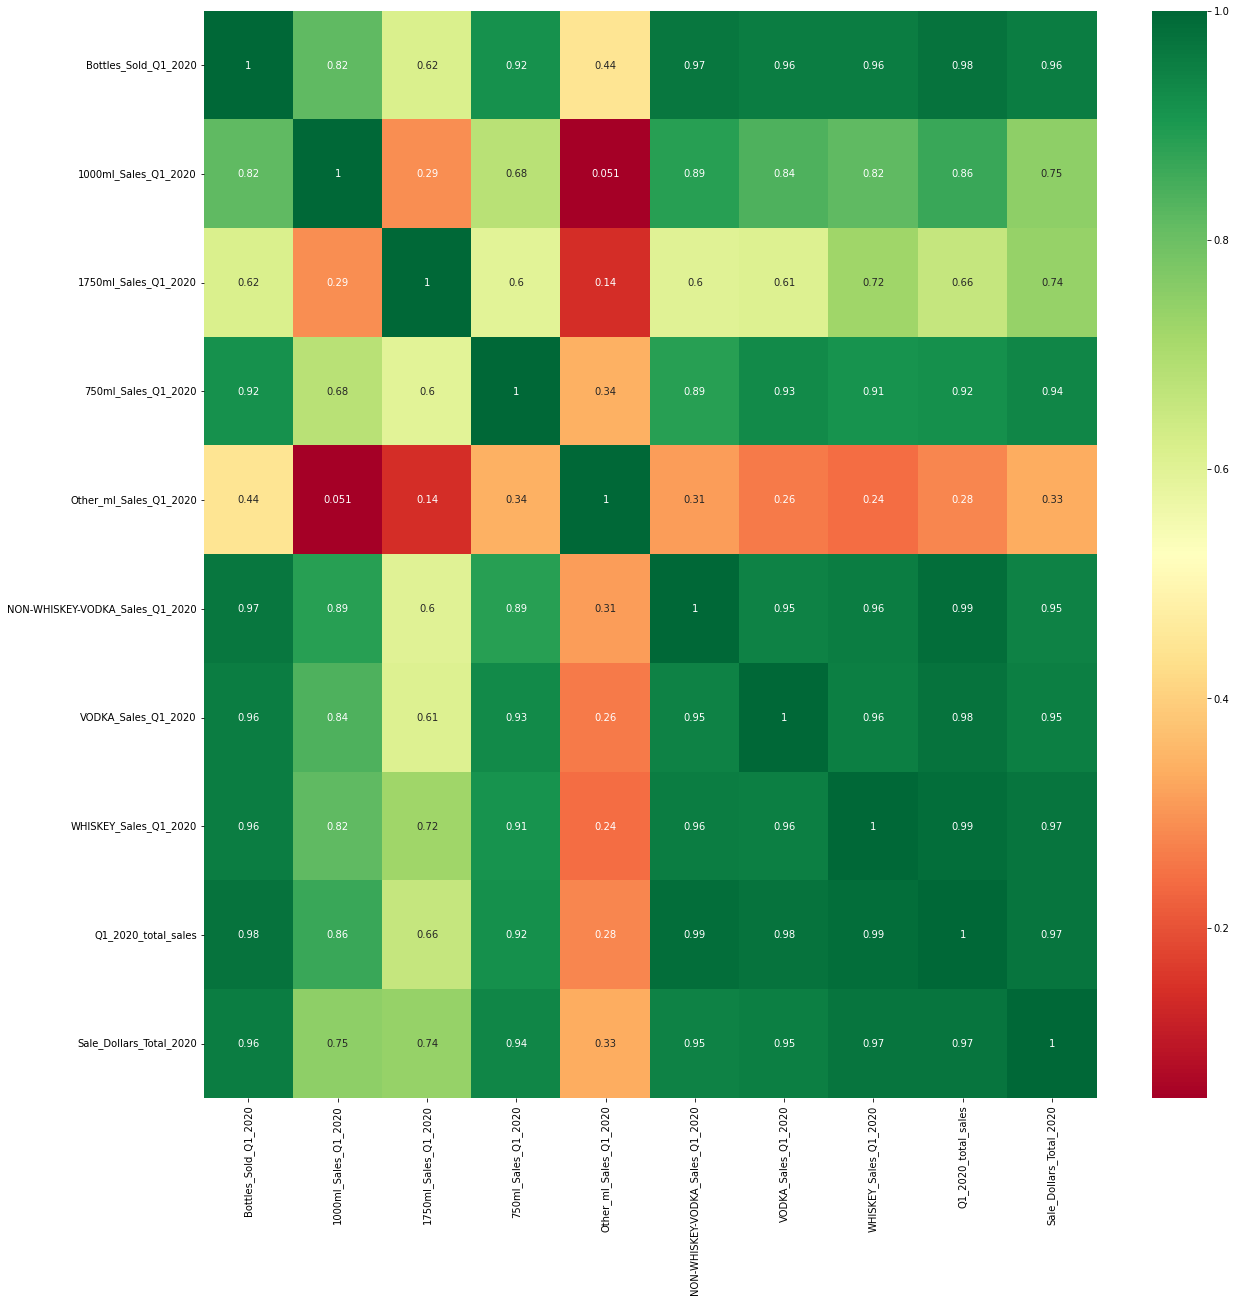

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns

corrmat = model_df_2020.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

g=sns.heatmap(model_df_2020[top_corr_features].corr(), annot=True, cmap="RdYlGn")

#### 2021 data

In [39]:
X_2021 = model_df_2021.filter(feats_2021,axis = 1)
y_2021 = model_df_2021["Sale_Dollars_Total_2021"]
X_train_2021, X_test_2021, y_train_2021, y_test_2021 = train_test_split(X_2021, y_2021, test_size=0.3, random_state=1)
X_train_2021

,Q1_2021_total_sales,WHISKEY_Sales_Q1_2021,NON-WHISKEY-VODKA_Sales_Q1_2021,VODKA_Sales_Q1_2021,Bottles_Sold_Q1_2021,750ml_Sales_Q1_2021
Store_Number,,,,,,
2130,296080.73,101467.58,140035.77,54577.38,17964.0,65215.95
4589,2577.73,1066.09,1238.43,273.21,148.0,1156.47
5954,5444.25,2255.31,1437.24,1751.70,702.0,1271.67
2677,7755.16,4814.04,1220.72,1720.40,1980.0,2248.28
5952,28958.34,11086.97,10753.48,7117.89,2568.0,13414.32
...,...,...,...,...,...,...
6088,2796.08,998.70,1396.61,400.77,235.0,889.65
5269,3248.88,1665.36,1087.20,496.32,384.0,1773.60
6257,0.00,0.00,0.00,0.00,0.0,0.00


#### 2022 data

In [40]:
X_2022 = model_df_2022.filter(feats_2022,axis = 1)
X_2022

,Q1_2022_total_sales,WHISKEY_Sales_Q1_2022,NON-WHISKEY-VODKA_Sales_Q1_2022,VODKA_Sales_Q1_2022,Bottles_Sold_Q1_2022,750ml_Sales_Q1_2022
Store_Number,,,,,,
2106,216484.40,60555.80,118637.43,37291.17,13885,69184.72
2130,361693.59,128091.60,174377.61,59224.38,20955,88044.00
2190,584212.81,197029.23,327809.17,59374.41,31491,423701.19
2191,321329.79,130748.25,137211.90,53369.64,18055,77379.94
2200,69603.23,32502.38,29017.75,8083.10,4225,14909.63
...,...,...,...,...,...,...
9039,27240.84,12566.40,11104.44,3570.00,2202,26042.04
9041,11203.20,782.40,10420.80,0.00,564,11203.20
9042,8949.48,3160.68,5175.84,612.96,630,8796.36


### Predicting total 2020 from 2020 Q1 data

In [41]:
#Linear regression
lm = linear_model.LinearRegression()

model = lm.fit(X_train_2020, y_train_2020)
predictions_2020 = lm.predict(X_2020)

print("predicted total sales in 2020: ", sum(predictions_2020))
print("Actual total sales in 2020   : ",sum(y_2020))
print("Rsquared value               : ", r2_score(y_2020, predictions_2020))

predicted total sales in 2020:  393735307.70415425
Actual total sales in 2020   :  396663131.65999883
Rsquared value               :  0.9599775806118352


### Predicting 2021 from 2020 model

In [42]:
predictions_2021_from_2020 = lm.predict(X_2021)
print("Predicted sales of 2021 :",sum(predictions_2021_from_2020))
print("Actual sales of 2021    :",sum(y_2021))

Predicted sales of 2021 : 464437900.68594825
Actual sales of 2021    : 428123535.40000015


### Predicting total 2021 sales from 2021 Q1 data

In [43]:
#Linear regression
lm = linear_model.LinearRegression()

model = lm.fit(X_train_2021, y_train_2021)
predictions_2021 = lm.predict(X_2021)

print("predicted total sales in 2021: ", sum(predictions_2021))
print("Actual total sales in 2021   : ",sum(y_2021))
print("Rsquared value               : ",r2_score(y_2021, predictions_2021))

predicted total sales in 2021:  432017595.3202764
Actual total sales in 2021   :  428123535.40000015
Rsquared value               :  0.9792122623251415


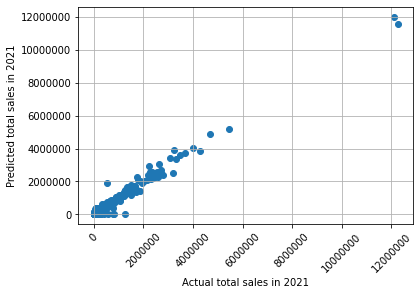

In [44]:
plt.xlabel('Actual total sales in 2021')
plt.ylabel('Predicted total sales in 2021')
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.get_xaxis().get_major_formatter().set_scientific(False)
plt.scatter(y_2021, predictions_2021)
plt.xticks(rotation = 45)
plt.grid()
plt.draw()

### Predicting 2022 total sales from 2021 Q1 model

In [45]:
predictions_2022 = model.predict(X_2022)
print("Predicted sales of 2022: ",sum(predictions_2022))

Predicted sales of 2022:  444166397.44653684


### Alternative method of predictitng 2022 from 2021 data. Using model intercept and co-effs

In [46]:
b0_2021 = model.intercept_
coefs = list(model.coef_)
b1_2021 = coefs[0]
b2_2021 = coefs[1]
b3_2021 = coefs[2]
b4_2021 = coefs[3]
b5_2021 = coefs[4]
b6_2021 = coefs[5]
y_pred =  b0_2021 + b1_2021*model_df_2022[feats_2022[0]].values + b2_2021*model_df_2022[feats_2022[1]] + b3_2021*model_df_2022[feats_2022[2]] + b4_2021*model_df_2022[feats_2022[3]] + b5_2021*model_df_2022[feats_2022[4]] + b6_2021*model_df_2022[feats_2022[5]]
#print(sum(y_pred))

## K-fold cross validation

### Spliting Data

#### Defining the CV

In [63]:
cv = KFold(n_splits=5, shuffle=True, random_state=1)

#### 2020 data

In [64]:
X_2020 = np.array(model_df_2020.filter(feats_2020,axis = 1))
y_2020 = np.array(model_df_2020["Sale_Dollars_Total_2020"])

#### 2021 data

In [65]:
X_2021 = np.array(model_df_2021.filter(feats_2021,axis = 1))
y_2021 = np.array(model_df_2021["Sale_Dollars_Total_2021"])

#### 2022 data

In [66]:
X_2022 = model_df_2022.filter(feats_2022,axis = 1)

### Predicting total 2020 and 2021 sales from 2020 Q1 data

In [67]:
from statistics import mean
lm = linear_model.LinearRegression()
pred_2020 = []
pred_2021 = []
r2 = []
change_per = []

# Using the 5-fold validation
for train_ix, test_ix in cv.split(X_2020):
  X_train_2020, X_test_2020 = X_2020[train_ix, :], X_2020[test_ix, :]
  y_train_2020, y_test_2020 = y_2020[train_ix], y_2020[test_ix]

  model = lm.fit(X_train_2020, y_train_2020)
  predictions_2020 = lm.predict(X_2020)
  predictions_2021 = lm.predict(X_2021)
  pred_2020.append(sum(predictions_2020))
  pred_2021.append(sum(predictions_2021))
  change_in_sale = round(((sum(predictions_2021) - sum(y_2020))/abs(sum(y_2020)))*100,2)
  change_per.append(change_in_sale)
  r2.append(r2_score(y_2020, predictions_2020))

  '''print("-------------------------model start----------------------\n")
  print("predicted total sales in 2020: ", sum(predictions_2020))
  print("Actual total sales in 2020: ",sum(y_2020))
  print(r2_score(y_2020, predictions_2020))
  print("predicted total sales in 2021 from 2020 model", sum(predictions_2021))
  print("Actual sales in 2021: ",sum(y_2021))
  print("Actual change in sales from 2020 to 2021: ",round(((sum(y_2021) - sum(y_2020))/abs(sum(y_2020)))*100,2),"%")
  print("predicted change in sales from 2020 to 2021: ",round(((sum(predictions_2021) - sum(y_2020))/abs(sum(y_2020)))*100,2),"%")
  print("\n-------------------------model end------------------------\n")'''

print("Predicted sales of 2020     : ",mean(pred_2020))
print("Actual total sales in 2020  : ",sum(y_2020))
print("Mean r2 value               : ",mean(r2))
print("Predicted sales in 2021     : ",mean(pred_2021))
print("Actual sales in 2021        : ",sum(y_2021))
print("Predicted change in sales from 2020 to 2021: ",mean(change_per),"%")
print("Actual change in sales from 2020 to 2021   : ",round(((sum(y_2021) - sum(y_2020))/abs(sum(y_2020)))*100,2),"%")

Predicted sales of 2020     :  397777898.72461855
Actual total sales in 2020  :  396663131.65999883
Mean r2 value               :  0.960751667813325
Predicted sales in 2021     :  465905958.9958432
Actual sales in 2021        :  428123535.40000015
Predicted change in sales from 2020 to 2021:  17.456 %
Actual change in sales from 2020 to 2021   :  7.93 %


### Predicting total 2021 and 2022 sales from 2021 Q1 data

In [68]:
# Linear regression
lm = linear_model.LinearRegression()
pred_2021 = []
pred_2022 = []
r2 = []
change_per = []

# Using the 5-fold validation
for train_ix, test_ix in cv.split(X_2021):

  X_train_2021, X_test_2021 = X_2021[train_ix, :], X_2021[test_ix, :]
  y_train_2021, y_test_2021 = y_2021[train_ix], y_2021[test_ix]

  model = lm.fit(X_train_2021, y_train_2021)
  predictions_2021 = lm.predict(X_2021)
  predictions_2022 = lm.predict(X_2022)

  pred_2021.append(sum(predictions_2021))
  pred_2022.append(sum(predictions_2022))
  change_in_sale = round(((sum(predictions_2022) - sum(y_2021))/abs(sum(y_2021)))*100,2)
  change_per.append(change_in_sale)
  r2.append(r2_score(y_2021, predictions_2021))

  '''print("-------------------------model start----------------------")
  print("predicted    sales in 2021: ", sum(predictions_2021))
  print("Actual total sales in 2021: ",sum(y_2021))
  print(r2_score(y_2021, predictions_2021))
  print("predicted total sales in 2022 from 2021 model", sum(predictions_2022))
  print("predicted change in sales from 2021 to 2022: ",round(((sum(predictions_2022) - sum(y_2021))/abs(sum(y_2021)))*100,2),"%")
  print("-------------------------model end------------------------\n")'''

print("Predicted sales of 2021     : ",mean(pred_2021))
print("Actual total sales in 2021  : ",sum(y_2021))
print("Mean r2 value               : ",mean(r2))
print("Predicted sales in 2022     : ",mean(pred_2022))
print("Predicted change in sales from 2021 to 2022: ",mean(change_per),"%")

Predicted sales of 2021     :  428707595.2118638
Actual total sales in 2021  :  428123535.40000015
Mean r2 value               :  0.9793087996794642
Predicted sales in 2022     :  441484747.3883649
Predicted change in sales from 2021 to 2022:  3.122 %


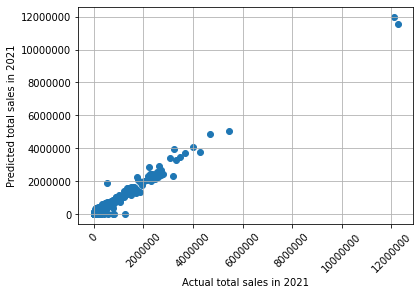

In [69]:
plt.xlabel('Actual total sales in 2021')
plt.ylabel('Predicted total sales in 2021')
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.get_xaxis().get_major_formatter().set_scientific(False)
plt.scatter(y_2021, predictions_2021)
plt.xticks(rotation = 45)
plt.grid()
plt.draw()

### Alternative method of predictitng 2022 from 2021 data. Using model intercept and co-effs

In [70]:
b0_2021 = model.intercept_
coefs = list(model.coef_)
b1_2021 = coefs[0]
b2_2021 = coefs[1]
b3_2021 = coefs[2]
b4_2021 = coefs[3]
b5_2021 = coefs[4]
b6_2021 = coefs[5]
y_pred =  b0_2021 + b1_2021*model_df_2022[feats_2022[0]].values + b2_2021*model_df_2022[feats_2022[1]] + b3_2021*model_df_2022[feats_2022[2]] + b4_2021*model_df_2022[feats_2022[3]] + b5_2021*model_df_2022[feats_2022[4]] + b6_2021*model_df_2022[feats_2022[5]]
#print(sum(y_pred))